In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid_19_data.csv


Kaggle Notebook : https://www.kaggle.com/shohanurrahaman/covid-19-data-eda

**Data Cleaning and Preprocessing**

In [2]:
raw_data = pd.read_csv("../input/covid_19_data.csv")

#display(raw_data.shape)
display(raw_data.head())


# data cleaning
data = pd.DataFrame(raw_data, columns = ['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])
data['Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')
data['Country/Region'] = data['Country/Region'].replace('Iran (Islamic Republic of)', 'Iran')
	
data = data.fillna(0)

#display(data.head())



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**Total Number of Confirmed, Deaths, Rocovered and Active case of Covid-19**

In [3]:
temp = data.groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
#print(data.groupby('ObservationDate')['Deaths'].sum().max())
display(temp.max())

ObservationDate    03/10/2020
Confirmed              118582
Deaths                   4262
Recovered               64404
Active                  58809
dtype: object

**Plotting the Total Data**

[118582.  64404.  58809.   4262.]


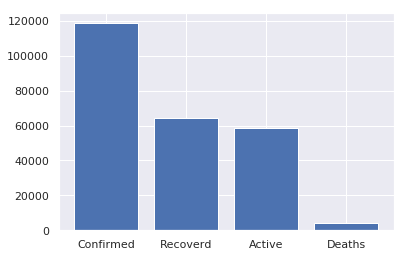

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

value = data.groupby('ObservationDate')['Confirmed'].sum().max()
value = np.append(value, data.groupby('ObservationDate')['Recovered'].sum().max())
value = np.append(value, data.groupby('ObservationDate')['Active'].sum().max())
value = np.append(value, data.groupby('ObservationDate')['Deaths'].sum().max())

label = ['Confirmed', 'Recoverd', 'Active', 'Deaths']

print(value)

y_pos = np.arange(len(label))
 
# Create bars
plt.bar(y_pos, value, width=0.8)
 
# Create names on the x-axis
plt.xticks(y_pos, label)
 
# Show graphic
plt.show()

**Number of Confimred Covid-19 Virus**

In [5]:
grouped = data.groupby(['Country/Region'])['Confirmed'].max().reset_index()
#display(grouped.head(10))

temp = grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
display(temp.head(10))

,Country/Region,Confirmed
0,China,67760.0
1,Italy,10149.0
2,Iran,8042.0
3,Republic of Korea,7513.0
4,South Korea,7478.0
5,France,1784.0
6,Spain,1695.0
7,Germany,1457.0
8,Others,706.0
9,Japan,581.0


**Number of Deaths Covid-19 Virus**

In [6]:
grouped = data.groupby(['Country/Region'])['Deaths'].max().reset_index()
#display(grouped.head(10))

temp = grouped.sort_values('Deaths', ascending=False).reset_index(drop=True)
display(temp.head(10))

,Country/Region,Deaths
0,China,3024.0
1,Italy,631.0
2,Iran,291.0
3,Republic of Korea,54.0
4,South Korea,53.0
5,Spain,35.0
6,France,33.0
7,US,23.0
8,Japan,17.0
9,Iraq,7.0
